In [ ]:
import medmnist
from medmnist import OCTMNIST
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from torch.utils.data import ConcatDataset

# Load predefined splits
train_set = OCTMNIST(split='train', download=True)
val_set = OCTMNIST(split='val', download=True)
test_set = OCTMNIST(split='test', download=True)

# Merge all splits into a single dataset
full_dataset = ConcatDataset([train_set, val_set, test_set])

print(f"Total dataset size: {len(full_dataset)} images")


Total dataset size: 109309 images


In [ ]:
sample_image, sample_label = full_dataset[0]

if not isinstance(sample_image, np.ndarray):
    sample_image = np.array(sample_image)

print(f"Image Shape: {sample_image.shape}")
print(f"Image Data Type: {sample_image.dtype}")
print(f"Sample Label: {sample_label}")



Image Shape: (28, 28)
Image Data Type: uint8
Sample Label: [0]


In [ ]:
# Extract all labels
all_labels = np.array([full_dataset[i][1] for i in range(len(full_dataset))])

# Count occurrences of each class
unique_classes, class_counts = np.unique(all_labels, return_counts=True)

# Print class distribution
print(f"Classes: {unique_classes}")
print(f"Class Counts: {class_counts}")

# Compute class percentages
class_percentages = (class_counts / class_counts.sum()) * 100
print(f"Class Percentages: {class_percentages}")


Classes: [0 1 2 3]
Class Counts: [37455 11598  8866 51390]
Class Percentages: [34.26524806 10.61028827  8.11095152 47.01351215]


In [ ]:
# Extract pixel values from first 10,000 images for efficiency
all_pixels = np.concatenate([
    np.array(full_dataset[i][0]).flatten() for i in range(min(10000, len(full_dataset)))
])

# Compute pixel statistics
print(f"Pixel Min: {all_pixels.min()}, Pixel Max: {all_pixels.max()}")
print(f"Pixel Mean: {all_pixels.mean():.4f}, Pixel Std Dev: {all_pixels.std():.4f}")

Pixel Min: 0, Pixel Max: 255
Pixel Mean: 47.9222, Pixel Std Dev: 49.7935


In [ ]:
# Compute standard deviation per image
image_variability = [np.std(np.array(full_dataset[i][0])) for i in range(min(1000, len(full_dataset)))]

# Print the average image variability
print(f"Average Image Variability: {np.mean(image_variability):.4f}")

Average Image Variability: 42.3182


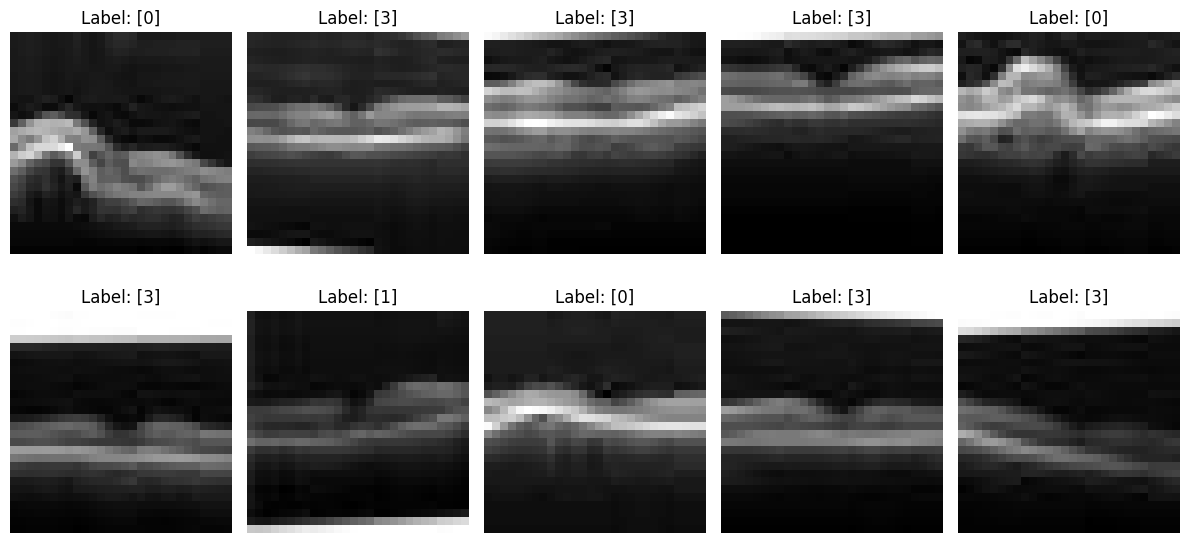

In [ ]:
# Plot sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    img, lbl = full_dataset[i]

    # Convert image to NumPy array if needed
    if not isinstance(img, np.ndarray):
        img = np.array(img)

    # Display image correctly
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {lbl}")
    ax.axis('off')

plt.tight_layout()
plt.show()


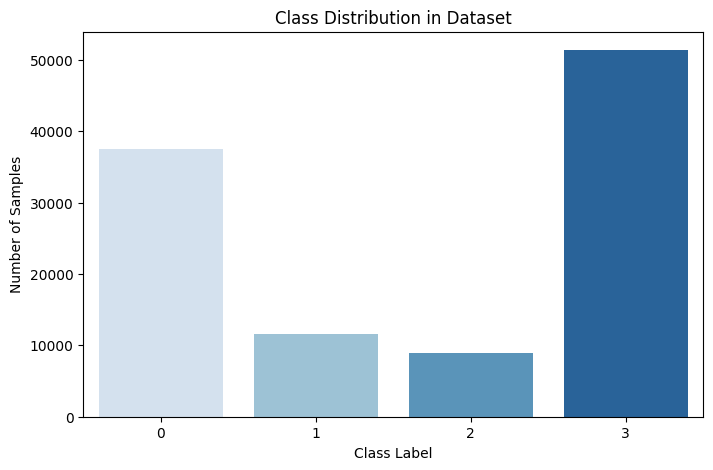

In [ ]:
unique_classes_str = [str(cls) for cls in unique_classes]

plt.figure(figsize=(8, 5))

# Corrected Seaborn barplot function
sns.barplot(x=unique_classes_str, y=class_counts, hue=unique_classes_str,
            palette=sns.color_palette("Blues", n_colors=len(unique_classes)), legend=False)

plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Dataset")
plt.show()

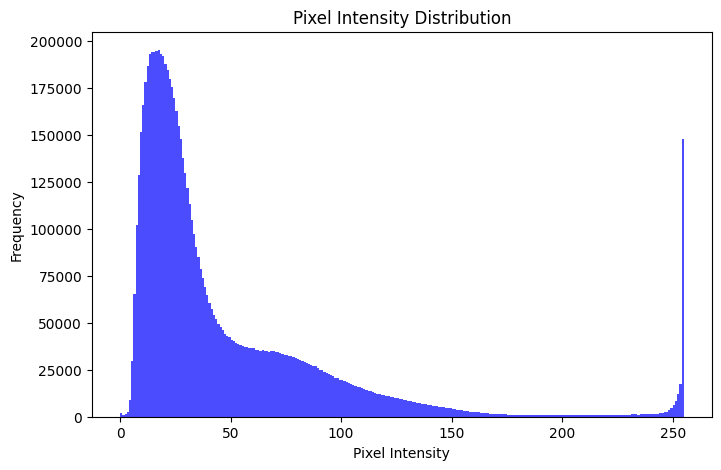

In [ ]:
all_pixels = np.array(all_pixels)

plt.figure(figsize=(8, 5))
plt.hist(all_pixels, bins='auto', color='blue', alpha=0.7)  # 'auto' adapts bin count
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

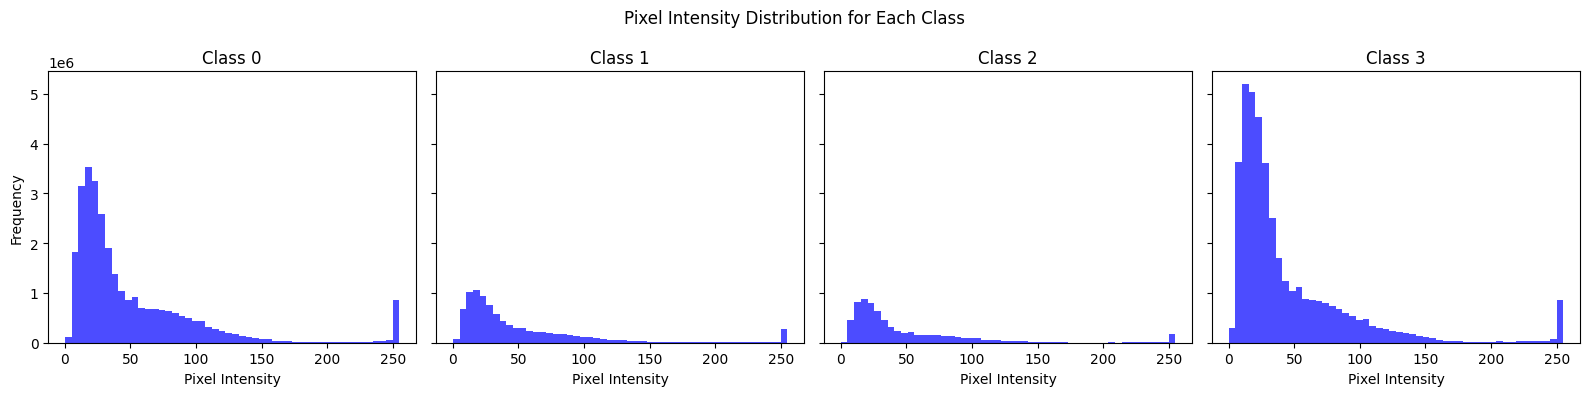

In [ ]:
fig, axes = plt.subplots(1, len(unique_classes), figsize=(16, 4), sharey=True)

for i, class_label in enumerate(unique_classes):
    class_pixels = np.concatenate([
        np.array(img).flatten() for img, lbl in full_dataset if lbl == class_label
    ])

    axes[i].hist(class_pixels, bins=50, color='blue', alpha=0.7)
    axes[i].set_title(f"Class {class_label}")
    axes[i].set_xlabel("Pixel Intensity")

axes[0].set_ylabel("Frequency")

plt.suptitle("Pixel Intensity Distribution for Each Class")
plt.tight_layout()
plt.show()

In [ ]:
# Function to normalize images in the dataset (convert to tensor)
def normalize_images(dataset):
    return torch.stack([
        torch.from_numpy(np.array(img)).float().unsqueeze(0) / 255.0  # Add channel dim & normalize
        for img, _ in dataset
    ])

# Apply normalization
X_normalized = normalize_images(full_dataset)

# Verify normalization
print(f"Min Pixel Value: {X_normalized.min().item()}, Max Pixel Value: {X_normalized.max().item()}")
print(f"Mean Pixel Value: {X_normalized.mean().item():.4f}, Pixel Std Dev: {X_normalized.std().item():.4f}")

# Check shape of first image
print(f"Shape of first image: {X_normalized[0].shape}")  # Expected: (1, 28, 28)


Min Pixel Value: 0.0, Max Pixel Value: 1.0
Mean Pixel Value: 0.1890, Pixel Std Dev: 0.1964
Shape of first image: torch.Size([1, 28, 28])


In [ ]:
# Convert labels efficiently
y_numpy = np.array([label for _, label in full_dataset])  # Convert list to NumPy first
y_tensor = torch.from_numpy(y_numpy).long()  # Convert NumPy array to PyTorch tensor

# Verify shape
print(f"Label Tensor Shape: {y_tensor.shape}")  # Expected: (109309,)


Label Tensor Shape: torch.Size([109309, 1])


In [ ]:
!pip install --upgrade --force-reinstall imbalanced-learn

  Using cached numpy-2.2.2-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.15.1-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.2.2-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)
Using cached scikit_learn-1.6.1-cp310-cp310-macosx_12_0_arm64.whl (11.1 MB)
Using cached scipy-1.15.1-cp310-cp310-macosx_14_0_arm64.whl (24.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfull

In [ ]:
from imblearn.over_sampling import SMOTE

# Flatten images for SMOTE
X_flat = X_normalized.view(X_normalized.shape[0], -1).numpy()
y_flat = y_tensor.numpy()

# Apply SMOTE (Only on Training Data Later)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y_flat)

# Convert back to tensors
X_balanced = torch.tensor(X_resampled).view(-1, 1, 28, 28)
y_balanced = torch.tensor(y_resampled)

# Verify new class distribution
unique, counts = np.unique(y_balanced.numpy(), return_counts=True)
print(f"New Class Distribution: {dict(zip(unique, counts))}")


New Class Distribution: {np.int64(0): np.int64(51390), np.int64(1): np.int64(51390), np.int64(2): np.int64(51390), np.int64(3): np.int64(51390)}


In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 48.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


Optimized CLAHE Min: 0.027450980618596077, Max: 1.0


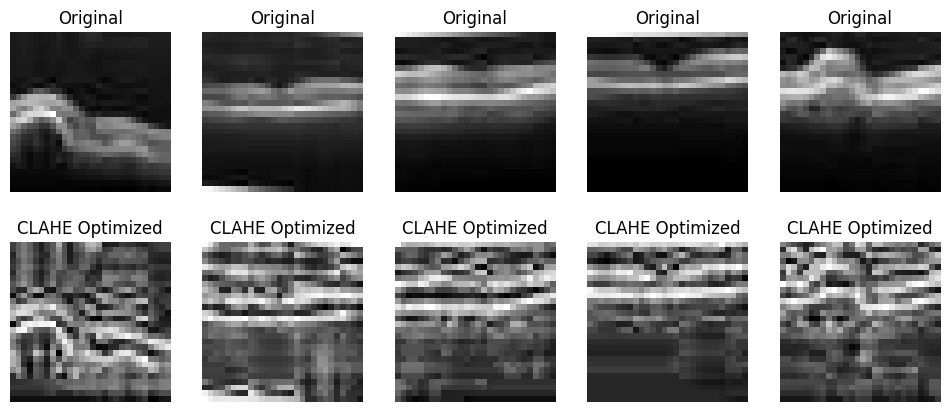

In [ ]:
import cv2

# Function to apply CLAHE with optimized parameters
def apply_CLAHE(image_tensor, clip_limit=1.5, grid_size=10):
    image_np = image_tensor.squeeze(0).numpy()  # Convert to NumPy (remove channel dim)

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(grid_size, grid_size))
    equalized = clahe.apply((image_np * 255).astype(np.uint8))  # Convert to uint8, apply CLAHE

    return torch.tensor(equalized, dtype=torch.float32).unsqueeze(0) / 255.0  # Normalize back

# Apply optimized CLAHE to all images
X_clahe_optimized = torch.stack([apply_CLAHE(img) for img in X_balanced])

# Verify pixel range after CLAHE
print(f"Optimized CLAHE Min: {X_clahe_optimized.min().item()}, Max: {X_clahe_optimized.max().item()}")

# Compare visual results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i in range(5):
    axes[0, i].imshow(X_balanced[i].squeeze(0), cmap="gray")
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")

    axes[1, i].imshow(X_clahe_optimized[i].squeeze(0), cmap="gray")
    axes[1, i].set_title("CLAHE Optimized")
    axes[1, i].axis("off")

plt.show()


In [ ]:
import torchvision.transforms as transforms

# Define the augmentation pipeline
augmentation = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Small rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Brightness & contrast shifts
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of flipping
])

# Apply augmentations to the dataset
X_augmented = torch.stack([augmentation(img) for img in X_contrast])

# Verify shape and range after augmentation
print(f"Augmented Min: {X_augmented.min().item()}, Max: {X_augmented.max().item()}")
print(f"Shape of augmented images: {X_augmented.shape}")


Augmented Min: 0.0, Max: 1.0
Shape of augmented images: torch.Size([205560, 1, 28, 28])


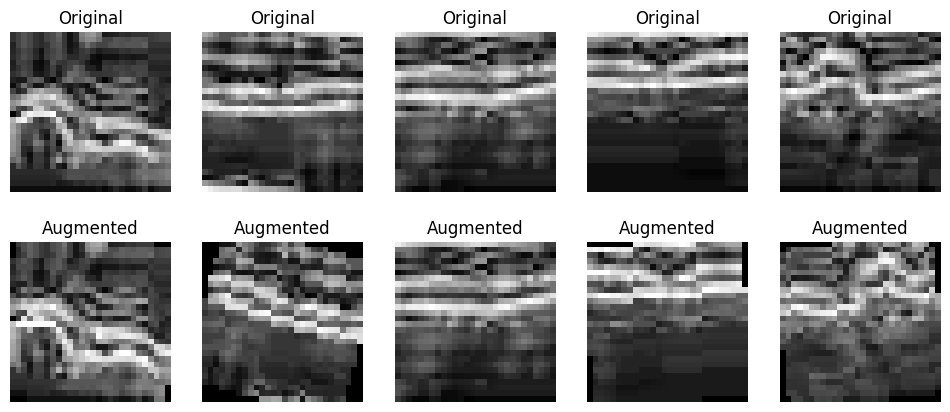

In [ ]:
# Select a few samples to visualize
num_samples = 5
fig, axes = plt.subplots(2, num_samples, figsize=(12, 5))

for i in range(num_samples):
    # Original Image
    axes[0, i].imshow(X_contrast[i].squeeze(), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")

    # Augmented Image
    axes[1, i].imshow(X_augmented[i].squeeze(), cmap='gray')
    axes[1, i].set_title("Augmented")
    axes[1, i].axis("off")

plt.show()


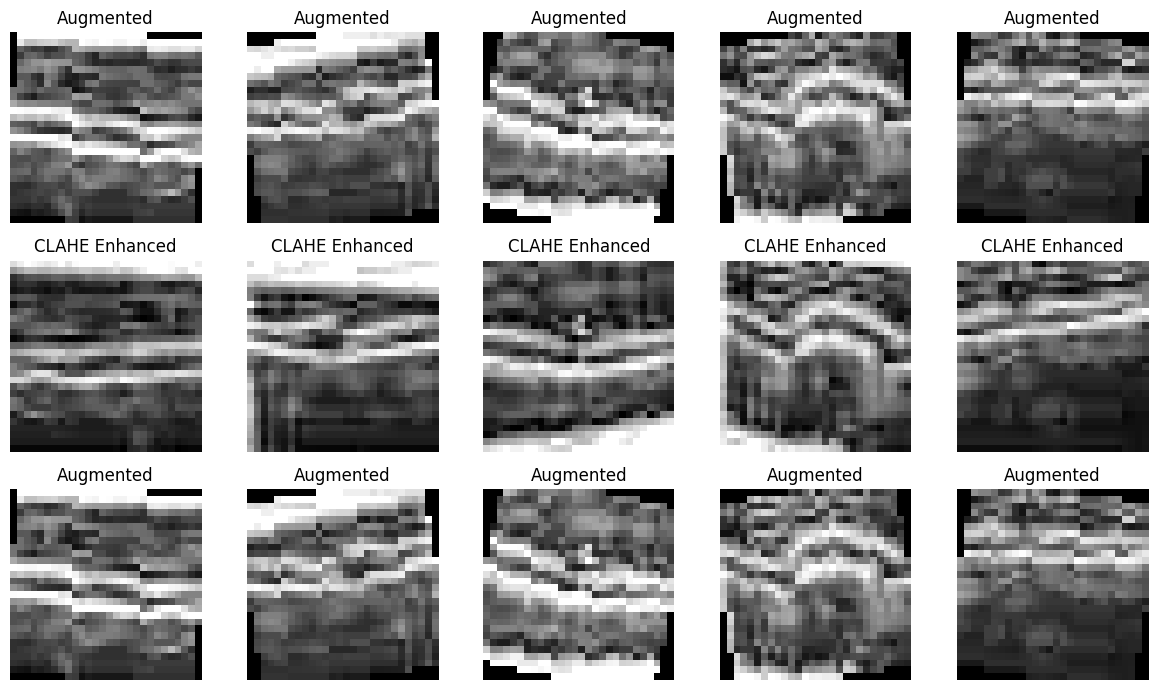

In [ ]:
# Select random indices within the valid range
indices = torch.randint(0, X_augmented.shape[0], (5,))  # Sample from the correct dataset

# Plot original, CLAHE-enhanced, and augmented versions
fig, axes = plt.subplots(3, 5, figsize=(12, 7))

for i, idx in enumerate(indices):
    axes[0, i].imshow(X_augmented[idx].squeeze(), cmap="gray")  # Fix: Use X_augmented
    axes[0, i].set_title("Augmented")
    axes[0, i].axis("off")

    axes[1, i].imshow(X_contrast[idx].squeeze(), cmap="gray")  # Fix: Use X_contrast
    axes[1, i].set_title("CLAHE Enhanced")
    axes[1, i].axis("off")

    axes[2, i].imshow(X_augmented[idx].squeeze(), cmap="gray")
    axes[2, i].set_title("Augmented")
    axes[2, i].axis("off")

plt.tight_layout()
plt.show()


Final Class Distribution: {np.int64(0): np.int64(51390), np.int64(1): np.int64(51390), np.int64(2): np.int64(51390), np.int64(3): np.int64(51390)}


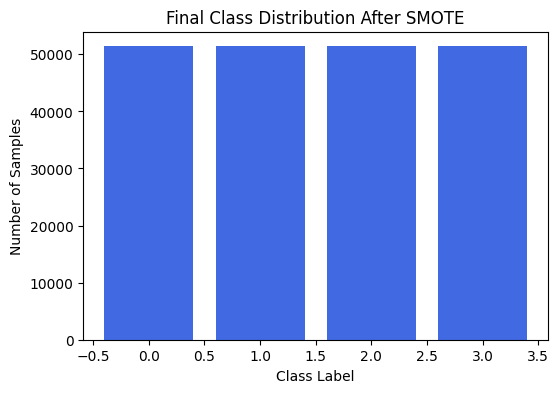

In [ ]:

# Count the number of samples per class
unique_classes, counts = np.unique(y_balanced.numpy(), return_counts=True)

# Print class distribution
print(f"Final Class Distribution: {dict(zip(unique_classes, counts))}")

# Visualize class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(unique_classes, counts, color="royalblue")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Final Class Distribution After SMOTE")
plt.show()


Min Pixel Value: 0.0, Max Pixel Value: 1.0
Mean Pixel Value: 0.3792, Pixel Std Dev: 0.2367


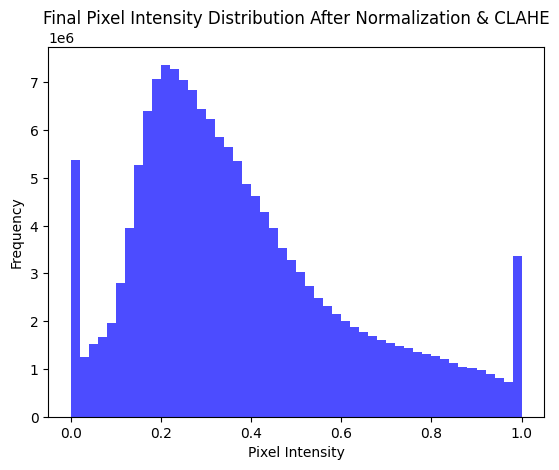

In [ ]:
print(f"Min Pixel Value: {X_augmented.min().item()}, Max Pixel Value: {X_augmented.max().item()}")
print(f"Mean Pixel Value: {X_augmented.mean().item():.4f}, Pixel Std Dev: {X_augmented.std().item():.4f}")

# Visualize pixel distribution
plt.hist(X_augmented.numpy().flatten(), bins=50, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Final Pixel Intensity Distribution After Normalization & CLAHE")
plt.show()

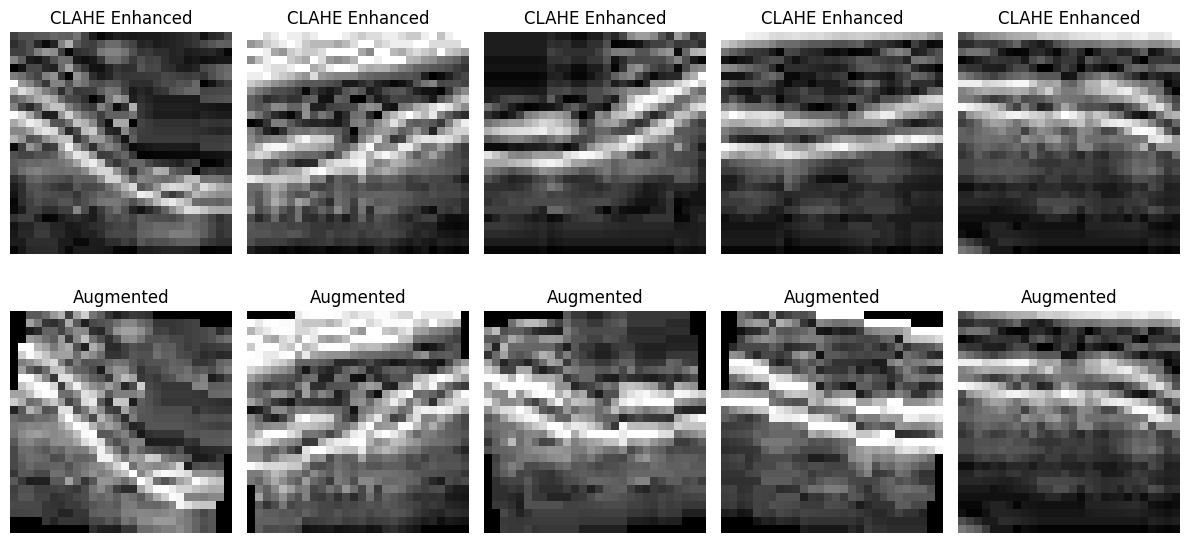

In [ ]:
import random

# Select random images to check augmentation
indices = random.sample(range(X_augmented.shape[0]), 5)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, idx in enumerate(indices):
    axes[0, i].imshow(X_contrast[idx].squeeze(), cmap="gray")
    axes[0, i].set_title("CLAHE Enhanced")
    axes[0, i].axis("off")

    axes[1, i].imshow(X_augmented[idx].squeeze(), cmap="gray")
    axes[1, i].set_title("Augmented")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
import torch

# Step 1: Create a fixed Test Set (10% of the dataset)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_augmented, y_balanced, test_size=0.1, random_state=42, stratify=y_balanced
)

print(f"Test Set Shape: {X_test.shape}, Labels: {y_test.shape}")

# Step 2: Apply Stratified K-Fold ONLY on the remaining (Train+Val) data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store tensor splits
splits = []
y_cpu = y_train_full.cpu().numpy().flatten()  # Convert labels to CPU

for train_idx, val_idx in skf.split(X_train_full, y_cpu):
    # Select train and validation sets
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    # Store the split
    splits.append((X_train, y_train, X_val, y_val))

# Use the first fold for training
X_train_final, y_train_final, X_val_final, y_val_final = splits[0]

print(f" Training Set Shape: {X_train_final.shape}, Labels: {y_train_final.shape}")
print(f"Validation Set Shape: {X_val_final.shape}, Labels: {y_val_final.shape}")

# Step 3: Verify Class Distributions
print(f"Train Class Distribution: {torch.bincount(y_train_final)}")
print(f"Validation Class Distribution: {torch.bincount(y_val_final)}")
print(f"Test Class Distribution: {torch.bincount(y_test)}")


Test Set Shape: torch.Size([20556, 1, 28, 28]), Labels: torch.Size([20556])
 Training Set Shape: torch.Size([148003, 1, 28, 28]), Labels: torch.Size([148003])
Validation Set Shape: torch.Size([37001, 1, 28, 28]), Labels: torch.Size([37001])
Train Class Distribution: tensor([37001, 37001, 37000, 37001])
Validation Class Distribution: tensor([9250, 9250, 9251, 9250])
Test Class Distribution: tensor([5139, 5139, 5139, 5139])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define CNN model
class OCTMNIST_CNN(nn.Module):
    def __init__(self):
        super(OCTMNIST_CNN, self).__init__()

        # Convolutional Layer 1: Input (1) → Output (32)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling Layer

        # Convolutional Layer 2: Input (32) → Output (64)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Convolutional Layer 3: Input (64) → Output (128)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 3 * 3, 64)  # Adjusted for input size after pooling
        self.dropout = nn.Dropout(0.5)  # Dropout for regularization
        self.fc2 = nn.Linear(64, 4)  # Output Layer (4 classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Conv1 → ReLU → Pooling
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Conv2 → ReLU → Pooling
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Conv3 → ReLU → Pooling

        x = x.view(x.size(0), -1)  # Flatten before FC layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)  # Final layer (logits output)

        return x


In [ ]:
# Instantiate model
model = OCTMNIST_CNN()

# Print model summary
print(model)


OCTMNIST_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=64, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=4, bias=True)
)


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the loss function (CrossEntropyLoss for multi-class classification)
loss_function = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer with learning rate 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Verify that they are correctly initialized
print(f"Loss Function: {loss_function}")
print(f"Optimizer: {optimizer}")


In [2]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Define DataLoaders
batch_size = 64  # Adjust based on memory availability
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Verify DataLoader Shapes
for inputs, labels in train_loader:
    print(f"Batch shape: {inputs.shape}, Labels shape: {labels.shape}")
    break

NameError: name 'X_train' is not defined

In [ ]:
import time

num_epochs = 10
batch_size = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

fold_results = []  # Store results for each fold

for fold, (X_train_final, y_train_final, X_val_final, y_val_final) in enumerate(splits, start=1):
    print(f"\n🔁 Starting Fold {fold}/{len(splits)}")
    print(f"📊 Fold {fold} - Training Set Shape: {X_train_final.shape}, Validation Set Shape: {X_val_final.shape}")

    # Define DataLoaders for the current fold
    train_dataset = TensorDataset(X_train_final, y_train_final)
    val_dataset = TensorDataset(X_val_final, y_val_final)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize a new model for each fold
    model = OCTMNIST_CNN().to(device)

    # Define optimizer and loss function
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Track metrics
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation Phase
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0

        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss += loss_function(val_outputs, val_labels).item()
                _, val_predicted = torch.max(val_outputs, 1)
                val_correct += (val_predicted == val_labels).sum().item()
                val_total += val_labels.size(0)

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Fold {fold} - Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    end_time = time.time()
    print(f"✅ Fold {fold} completed in {end_time - start_time:.2f} seconds\n")

    # Store fold results
    fold_results.append((train_losses, val_losses, train_accuracies, val_accuracies))

print("\nTraining complete for all folds!")



🔁 Starting Fold 1/5
📊 Fold 1 - Training Set Shape: torch.Size([148003, 1, 28, 28]), Validation Set Shape: torch.Size([37001, 1, 28, 28])
Fold 1 - Epoch 1/10 - Train Loss: 0.9921, Train Acc: 0.5543 - Val Loss: 0.7156, Val Acc: 0.6914
Fold 1 - Epoch 2/10 - Train Loss: 0.8342, Train Acc: 0.6356 - Val Loss: 0.7132, Val Acc: 0.7139
Fold 1 - Epoch 3/10 - Train Loss: 0.7705, Train Acc: 0.6714 - Val Loss: 0.6267, Val Acc: 0.7545
Fold 1 - Epoch 4/10 - Train Loss: 0.7355, Train Acc: 0.6865 - Val Loss: 0.6368, Val Acc: 0.7343
Fold 1 - Epoch 5/10 - Train Loss: 0.7103, Train Acc: 0.6984 - Val Loss: 0.6417, Val Acc: 0.7309
Fold 1 - Epoch 6/10 - Train Loss: 0.6876, Train Acc: 0.7086 - Val Loss: 0.5905, Val Acc: 0.7553
Fold 1 - Epoch 7/10 - Train Loss: 0.6543, Train Acc: 0.7267 - Val Loss: 0.6208, Val Acc: 0.7636
Fold 1 - Epoch 8/10 - Train Loss: 0.6344, Train Acc: 0.7362 - Val Loss: 0.5648, Val Acc: 0.7855
Fold 1 - Epoch 9/10 - Train Loss: 0.6176, Train Acc: 0.7423 - Val Loss: 0.5720, Val Acc: 0.769

In [3]:
# Define the path to save the model
import torch
model_save_path = "octmnist_cnn.pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)
print(f"Model weights saved at: {model_save_path}")


NameError: name 'model' is not defined

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset for test set
test_dataset = TensorDataset(X_test, y_test)

# Define DataLoader for testing set
batch_size = 64  # Keep batch size same as training
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Verify DataLoader shape
for inputs, labels in test_loader:
    print(f"✅ Test Batch shape: {inputs.shape}, Labels shape: {labels.shape}")
    break


✅ Test Batch shape: torch.Size([64, 1, 28, 28]), Labels shape: torch.Size([64])


In [ ]:
import torch
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set model to evaluation mode

# Tracking variables
correct, total = 0, 0
all_preds, all_labels = [], []

# Disable gradients for testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability

        # Track accuracy
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # Store predictions and labels for additional metrics
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute final test accuracy
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Compute Precision, Recall, and F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Check if we met the required threshold
if test_accuracy >= 0.75:
    print("Test accuracy meets the required threshold (>75%)!")
else:
    print("Test accuracy is below 75%. Consider improving the model.")


Test Accuracy: 78.79%
Precision: 0.8034
Recall: 0.7879
F1 Score: 0.7839
Test accuracy meets the required threshold (>75%)!


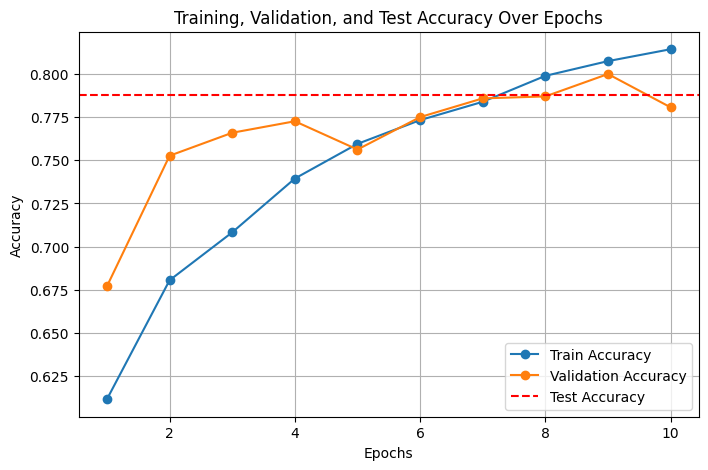

In [ ]:
# Create epochs list
epochs = list(range(1, len(train_accuracies) + 1))

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs, val_accuracies, label="Validation Accuracy", marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label="Test Accuracy")  # Test Accuracy

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()


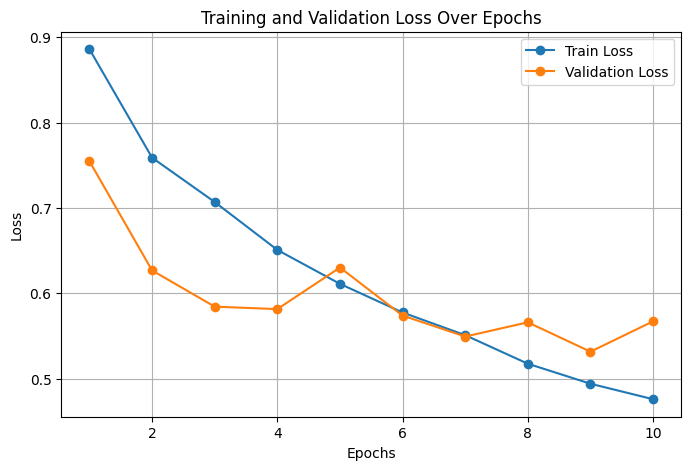

In [ ]:
# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='o')

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


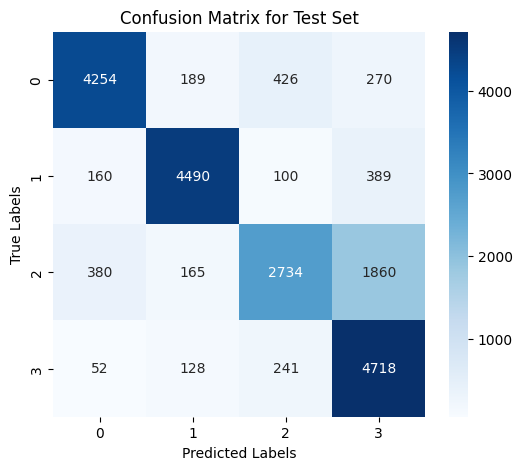

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute predictions on test set
all_preds, all_labels = [], []

model.eval()  # Set to evaluation mode
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Set")
plt.show()


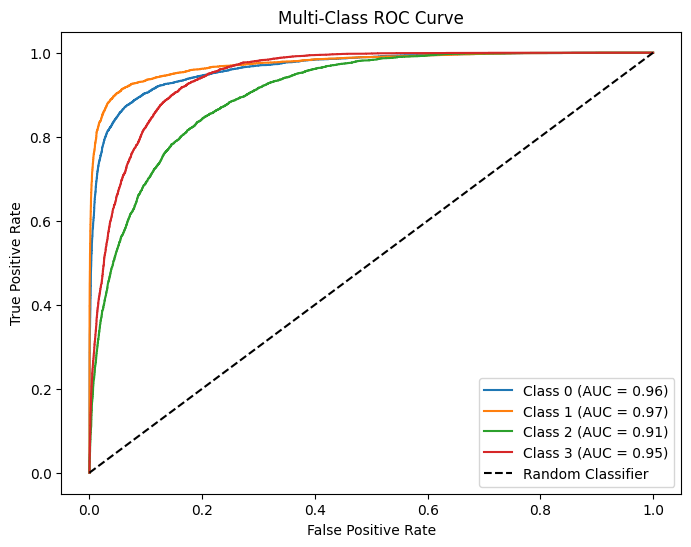

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert labels to one-hot encoding
num_classes = 4  # Number of classes
y_true_bin = label_binarize(all_labels, classes=np.arange(num_classes))

# Convert model outputs to probabilities
model.eval()
all_probs = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
        all_probs.extend(probs.cpu().numpy())

all_probs = np.array(all_probs)

# Compute ROC Curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()


In [ ]:
# Set model to evaluation mode
model.eval()

# Initialize test loss and accuracy tracking
test_loss, correct, total = 0.0, 0, 0

# Disable gradient calculation for inference
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, labels)  # Compute loss

        # Track loss
        test_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Compute final test accuracy and loss
test_loss /= len(test_loader)
test_accuracy = correct / total

# Print test performance
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 78.79%
Test Loss: 0.5644


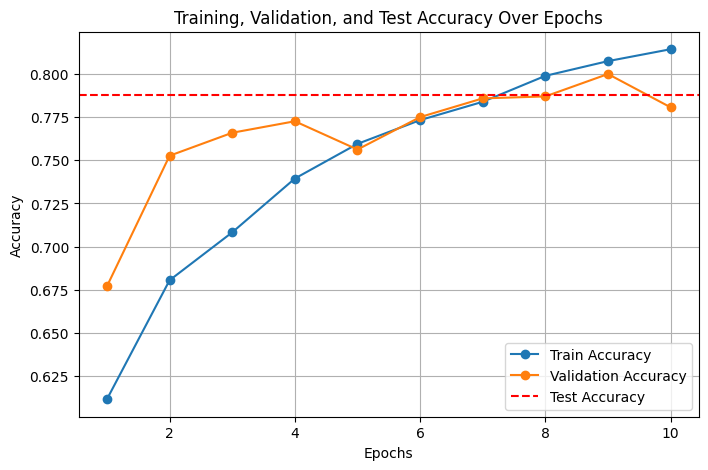

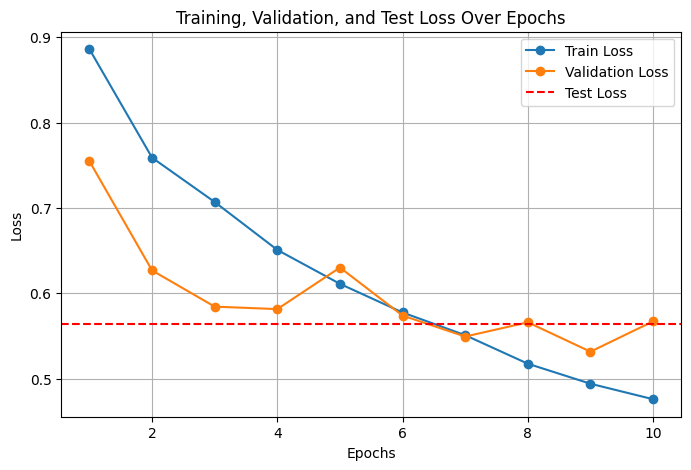

In [ ]:
epochs = range(1, len(train_accuracies) + 1)

# Plot Training, Validation, and Test Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, 'o-', label="Train Accuracy")
plt.plot(epochs, val_accuracies, 'o-', label="Validation Accuracy")
plt.axhline(y=test_accuracy, color='r', linestyle='--', label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss with Test Loss as Reference Line
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, 'o-', label="Train Loss")
plt.plot(epochs, val_losses, 'o-', label="Validation Loss")
plt.axhline(y=test_loss, color='r', linestyle='--', label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training, Validation, and Test Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Load the best model
model = OCTMNIST_CNN().to(device)
model.load_state_dict(torch.load("octmnist_cnn.pth"))
model.eval()  # Set to evaluation mode

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)

In [ ]:
best_val_loss = float("inf")
epochs_no_improve = 0
patience = 3  # Stop training after 3 epochs without improvement

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation phase
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss += loss_function(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_correct += (val_predicted == val_labels).sum().item()
            val_total += val_labels.size(0)

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Early stopping condition
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0  # Reset counter
        torch.save({'epoch': epoch+1,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': val_loss}, "best_model_improved.pth")  # Save best model
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered. Best Validation Loss: {best_val_loss:.4f}")
        break  # Stop training

    # Step scheduler
    scheduler.step(val_loss)


Epoch 1/10 - Train Loss: 0.4603, Train Acc: 0.8220 - Val Loss: 0.5484, Val Acc: 0.7963
Epoch 2/10 - Train Loss: 0.4403, Train Acc: 0.8286 - Val Loss: 0.5505, Val Acc: 0.7980
Epoch 3/10 - Train Loss: 0.4249, Train Acc: 0.8350 - Val Loss: 0.5683, Val Acc: 0.7863
Epoch 4/10 - Train Loss: 0.4093, Train Acc: 0.8429 - Val Loss: 0.5808, Val Acc: 0.7994
Early stopping triggered. Best Validation Loss: 0.5484


In [ ]:
# Load the best model from checkpoint
best_model = OCTMNIST_CNN().to(device)

checkpoint = torch.load("best_model_improved.pth")  # Load saved weights
best_model.load_state_dict(checkpoint['model_state_dict'])  # Restore model state
best_model.eval()  # Set model to evaluation mode

print("Best model loaded successfully!")


Best model loaded successfully!


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

best_model.eval()

test_loss, correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = best_model(inputs)
        loss = loss_function(outputs, labels)  # Compute loss

        # Track loss
        test_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # Store predictions and labels for precision-recall computation
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
test_accuracy = correct / total

precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Test Accuracy: 80.19%
Test Loss: 0.5545
Precision: 0.8090
Recall: 0.8019
F1 Score: 0.8037


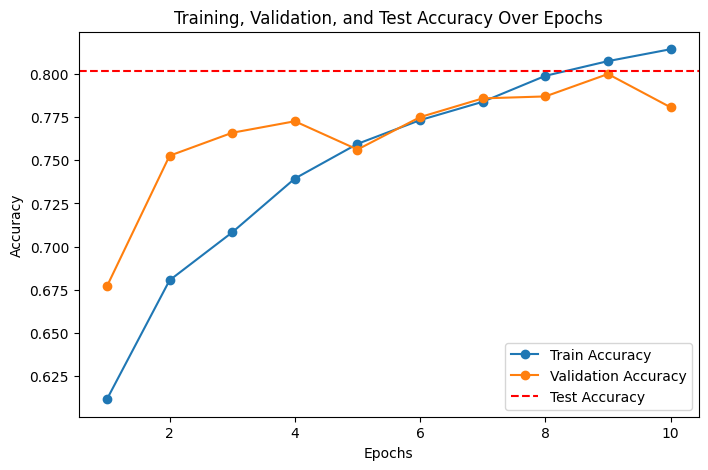

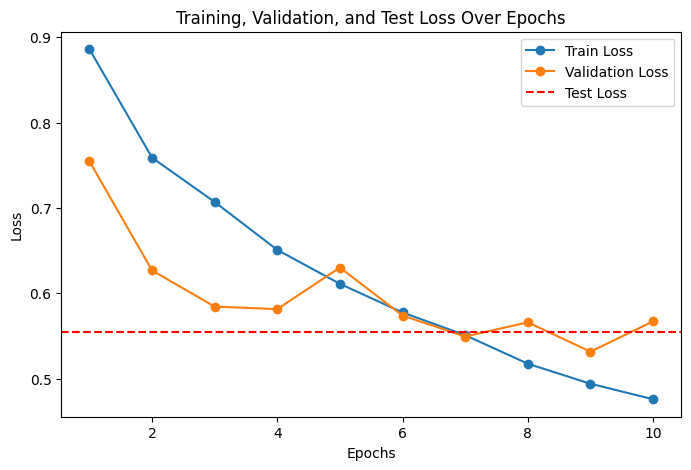

In [ ]:
# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training, Validation, and Test Accuracy Over Epochs")
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training, Validation, and Test Loss Over Epochs")
plt.legend()
plt.show()


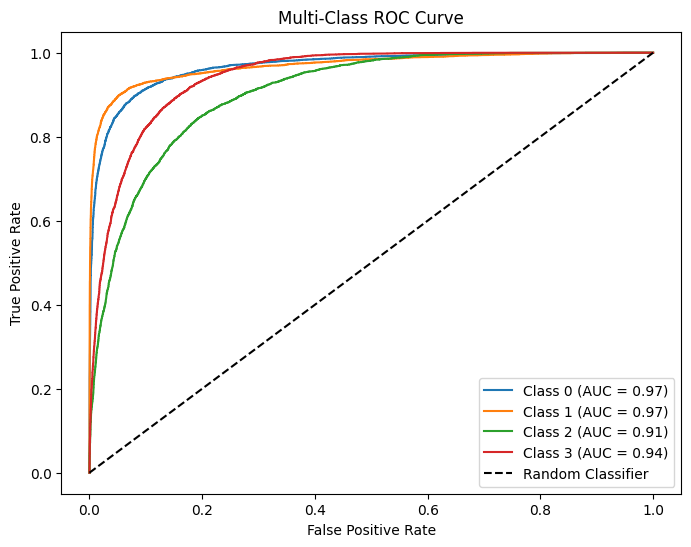

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Convert labels to one-hot encoding
num_classes = len(np.unique(all_labels))
y_test_bin = label_binarize(all_labels, classes=range(num_classes))

# Store softmax probabilities
y_pred_proba = []

# Get softmax probabilities from model
model.eval()
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_pred_proba_batch = torch.softmax(outputs, dim=1).cpu().numpy()
        y_pred_proba.extend(y_pred_proba_batch)  # Append instead of slicing

# Convert to NumPy array
y_pred_proba = np.array(y_pred_proba)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()
